In [7]:
import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt
import numpy as np

In [8]:
base_path = Path('C:\\Users\\thinkBookUser\\Desktop')
fit = pd.read_csv(Path(base_path,'Screening_Data_Analyzed','2019','12','05','caged','results','D07_fit.csv'))
fit = fit.replace([np.inf, -np.inf], np.nan)
tau = pd.read_csv(Path(base_path,'Screening_Data_Analyzed','2019','12','05','caged','results','D07_tau.csv'),'\t',header=None)
tau = tau.replace([np.inf, -np.inf], np.nan)
frameinterval = 2
def fit_function(x, a, b, c, d):
#    return a + b / (1 + np.exp(-c * (x - d))) # we us this one in the main routine, but here it does not comply, why?
    return a + b / (1 + np.exp(-4 * (x - d)/c)) # but

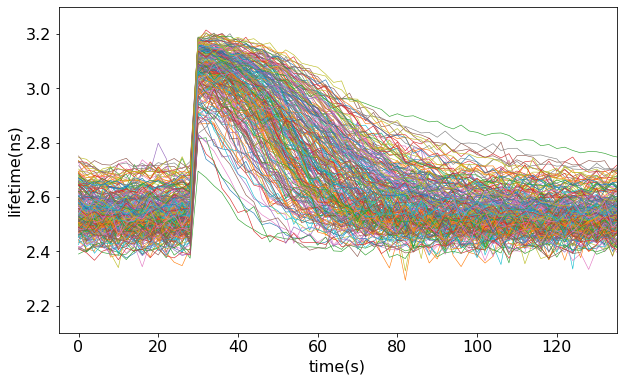

In [9]:
fig = plt.figure()
plt.rc('axes', labelsize=16)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=16)    # fontsize of the tick labels
title = "Multiple traces from caged screen ROI nr"+str(curve_nr)
tau_error_free = tau[fit['error']==0]
for i in range(len(tau_error_free)):
    plt.plot(xax,tau_error_free.iloc[i,:],linewidth=0.6)
plt.xlabel('time(s)')
plt.ylabel('lifetime(ns)')
plt.ylim([2.1,3.3])
plt.xlim([-5,135])
fig.set_size_inches([10,6])
#fig.savefig(Path('C:\\Users\\thinkBookUser\\Desktop', title +'_caged.svg'),dpi=300)

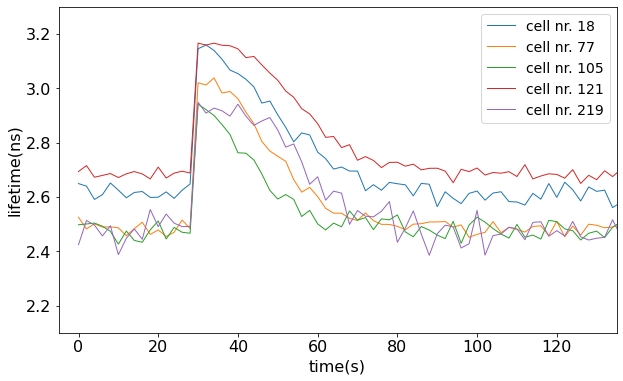

In [23]:
#selected traces
selection = [18, 77, 105, 121, 219]
fig = plt.figure()
title = "Selected traces from caged screen ROI nrs"+str(selection)
plt.rc('axes', labelsize=16)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=16)    # fontsize of the tick labels
tau_error_free = tau[fit['error']==0]
for selected in selection:
    plt.plot(xax,tau_error_free.iloc[selected,:],linewidth=1, label=selected)
plt.xlabel('time(s)')
plt.ylabel('lifetime(ns)')
#plt.legend(selection)
plt.legend(['cell nr. 18','cell nr. 77', 'cell nr. 105','cell nr. 121', 'cell nr. 219'], fontsize=14)
plt.ylim([2.1,3.3])
plt.xlim([-5,135])
fig.set_size_inches([10,6])
fig.savefig(Path('C:\\Users\\thinkBookUser\\Desktop', title +'_caged.svg'),dpi=300)

C:\Users\thinkBookUser\Anaconda3\envs\pde_screening\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\thinkBookUser\Anaconda3\envs\pde_screening\lib\site-packages\pandas\core\indexing.py:1675: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


C:\Users\thinkBookUser\Anaconda3\envs\pde_screening\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\thinkBookUser\Anaconda3\envs\pde_screening\lib\site-packages\pandas\core\indexing.py:1675: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


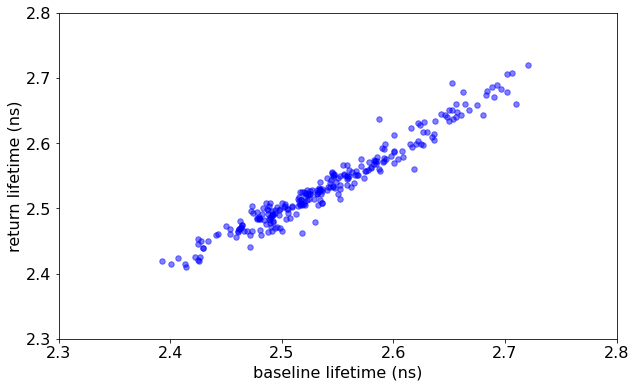

In [25]:
# for this same well D07 calculate the return time
errorfree_data = fit[fit['error']==0]
errorfree_data.loc[:,'finish tau(ns)'] = errorfree_data.loc[:,'start(ns)'].copy() + errorfree_data.loc[:,'range(ns)'].copy()
errorfree_data.loc[:,'return diff(ns)'] = errorfree_data.loc[:,'finish tau(ns)'].copy() - errorfree_data.loc[:,'start tau(ns)'].copy()
# scatterplot of return time vs basline
fig = plt.figure()
plt.rc('axes', labelsize=16)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=16)    # fontsize of the tick labels
title = 'Correlation between the Start and Return lifetime values'
plt.scatter(errorfree_data['start tau(ns)'],errorfree_data['finish tau(ns)'],  marker='o', color='blue', s=30, alpha=0.5)
plt.xlabel('baseline lifetime (ns)')
plt.ylabel('return lifetime (ns)')
#plt.title(title)
plt.xlim([2.3,2.8])
plt.ylim([2.3,2.8])
fig.set_size_inches([10,6])

In [ ]:
#fig.savefig(Path('C:\\Users\\thinkBookUser\\Desktop', title +'caged(20191205).svg'),dpi=300)